# Sorting algorithms
In this notebook some basic sorted algorithms are presented.

## Quadratic algorithms

## Bubble sort
This is a very simple sorting algorithm that behaves as follows:
* Loop over all the values from left to right, if the current element is greater than the next one then swap them.
* Repeat as many times as there are elements in the array
The idea here is that after the first linear scan the maximum element will be placed last, on the second scan the second maximum element will be placed second to last and so on. 

In [1]:
#############################
# Animation utilities
#############################
import matplotlib.pyplot as plt
from interactive_visualization.animation_utils import animate_list

def basic_sort_state(array, colors):
    bottom = min(array) - 1
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
    
    for i, value in enumerate(array):
        ax.fill([i + 0.1, i + 0.1, i + 1 - 0.1, i + 1 - 0.1, i + 0.1], [0, value - bottom, value - bottom, 0, 0], color=colors[i])
        
    plt.close(fig)
    return fig

In [2]:
def bubble_sort_state(array, i, j):
    result = []
    for k in range(len(array) - i):
        result.append('blue')
    for k in range(i):
        result.append('yellow')
        
    if j >= 0:
        result[j] = 'green'
    return basic_sort_state(array, result)

In [3]:
def bubble_sort(array):
    states = []
    comparisons = 0
    swaps = 0
    for i in range(len(array) - 1):
        for j in range(len(array) - 1 - i):
            states.append(bubble_sort_state(array, i, j))
            comparisons += 1
            if array[j] > array[j + 1]:
                swaps += 1
                array[j], array[j + 1] = array[j + 1], array[j]
    states.append(bubble_sort_state(array, len(array), -1))
    return states, comparisons, swaps

In [4]:
initial_array = [2, -11, 5, 8, 9, 7, -5, -8, -9, 10, 11, 13, -10]

In [5]:
array = [x for x in initial_array]
states, comparisons, swaps = bubble_sort(array)
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13]
Comparisons: 78
Swaps:       32


In [6]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=78), Output()), _dom_classes=('widget-interac…

## Analysis
There are two main operations: swaps and comparisons. 

The number of comparisons is calculated straightforwardly from the structure of the algorithm, it is the sum $1+2+\ldots+n-1$ where $n$ is the size of the array. This follows simply from fact that at iteration $i$ we need to do $n-i-1$ comparisons of the element with the next one. We end up with the $\frac{n(n-1)}{2}$ comparisons. 

What about swaps? In the worst case (array is sorted in descreasing order) we will get the same $\frac{n(n-1)}{2}$ as swap will be triggered for any comparison. Can we somehow estimate an average case? We actually can and it turns out that the number of swaps is half the number of comparisons on average but we need to introduce some additional concepts to prove it.

**Definition.** *Permutation* of order $n$ is the bijective function from $\{1, 2, \ldots, n\}$ to itself. For permutation $p$ we will usually refer to $p(i)$ as $p_i$ and the whole permutaion can be defined as sequence $(p_1, p_2, \ldots, p_n)$.  

Permutation is a concept that can be used to formalize sorting problem: given an array $a_1, \ldots, a_n$, we are to find permutation $p$ such that
$$
a_{p_1}\leq a_{p_2}\leq \ldots \leq a_{p_n}
$$
Note that if $a$ contains unique elements than the corresponding sorting $p$ is also unique.

**Definition.** *Transposition* is a permutation $p$ such that there are pair $(i, j)$, $i\neq j$
$$
p_k=
\begin{cases}
k, & k \neq i, j \\
j, & k=i \\
i, & k=j
\end{cases}
$$
*Remark.* Transposition is a permutation that swaps two elements.

**Definition.** *Trivial transposition* is a transposition that swaps consecutive pair.

**Definition.** *multiplication* of permutations $p$ and $q$ is such permutation $r$ that $r_i=p_{q_i}$.

*Remark.* Permutation multiplication is a function composition. You can think of permutation as a way to reorder some elements, multiplication $pq$ is equivalent to first reordering with $q$ and then reorderring the result with $p$. This is a crucial concept as any sorting algorithm can be represented as a multiplication of several transpositions.

Now comes the interesting part, as bubble sort only applies swaps for consecutive elements it can be represented as multiplication of trivial transpositions. The main idea of the analysis is that we can introduce a value determined by permutation that decreases with transposition applied in bubble sort.

**Definition**. *Inversion* in permutation $p$ is pair of indecies $i<j$ such that $p_i>p_j$. Denote the number of inversions of $p$ as $I(p)$. 

The number of inversions in permutation is what we are looking for, the following lemma describes the main idea behind the analysis.

**Lemma.** Given a permutation $p$ and trivial transposition $q$ then $|I(pq)-I(q)|=1$.  

**Proof.** Suppose that $q$ transposes $k, k+1$, consider four group of index pairs:
* $i, j\neq k$: inversions do not change here as $p_{q_i}$=$q_i$
* $i\in \{k, k+1\}, j > k+1$: the number of inversions do not change since this group contains both $(k, j), (k+1, j)$ and $p_{q_k}=p_{k+1}, p_{q_{k+1}}=p_k$
* $i<k, j\in\{k, k+1\}$: same as previous case
* $i=k, j=k+1$: if $p_k<p_{k+1}$ then $p_{q_k}=p_{k+1}>p_k=p_{q_{k+1}}$ and vice versa and so the number of permutation changes by $\pm 1$. $\blacksquare$

The thing is when we apply a sequence of consecutive swaps we actually construct a permutation that has the number of inversion not greater than the number of swaps performed. This can be viewed in the following way: if the permutation $p$ is required to sort an array, the number of consecutive swaps needed to sort it is at least $I(p)$ and there actually exists such set of exactly $I(p)$ swaps. This can be formalized in the following theorem

**Theorem.** A permutation $p$ with the number of inversions $I(p)$
* Can be represented as multiplication of $p=q_1q_2\ldots q_m$ of trivial transpositions with $m=I(p)$
* For any $m<I(p)$ no multiplication of $m$ trivial compositions result in $p$

**Proof.** The second part follows from the lemma: if such multiplication exists then
$$
I(q_1q_2\ldots q_m)\leq I(q_1q_2\ldots q_{m-1})+1\leq \ldots \leq m 
$$
contradicts with $m<I(p)$.

The first part can be proved by induction.
**Base.** Trivial
**Step.** Suppose that any permutation $q$ with $I(q)=m$ can be decomposed as a multiplication of $m$ trivial transpositions. Consider a $p$ with $I(p)=m+1$. Let $k$ be any pair such that $p_k>p_{k+1}$, there must exist one otherwise it's identity permutation with $I(p)=0$. Let $q$ be the trivial transposition that swaps $k, k+1$ then $I(pq)=I(p)-1$ and so there are $pq=q_1q_2\ldots q_{m-1}$ and finally with $pqq=p$ we get $p=q_1q_2\ldots q_{m-1}q$. $\blacksquare$

The final part is, what is the expected number of $I(p)$? The answer is quite simple from symmetry: consider $p$ and $q$ such that $q_i=n-p_i+1$. Obviously any pair forms inversion exactly in one of these permutations, moreover such any any permutation belongs to exactly one such pair and thus we splitted all the permutations in pairs such that any index pair form permutation exactly in one of them forming $\frac{n(n+1)}{2}$ inversions total. Thus the expected number of inversions in permutation (for uniform distribution over permutations) is $\frac{n(n-1)}{4}$. The following code demonstrates how to calculate the number of inversions in a simple fasion and logarithmic using RMQ based data structures.

In [7]:
def calc_inversions_simple(array):
    result = 0
    for i, x in enumerate(array):
        for j in range(i + 1, len(array)):
            if array[j] < x:
                result += 1
    return result

def calc_inversions_fast(array):
    tree_size = 1
    while tree_size < len(array):
        tree_size *= 2
    tree_size = tree_size
    tree = [0 for i in range(2 * tree_size)]
    
    def tree_insert(i):
        i += tree_size
        while i > 0:
            tree[i] += 1
            i //= 2
    
    def get_less_count(i):
        if i == tree_size - 1:
            return tree[1]
        i += tree_size
        result = 0
        while i > 0:
            if i % 2 == 0:
                result += tree[i]
            i = (i - 1) // 2
        return result
    
    pos = dict()
    for i, x in enumerate(sorted(array)):
        pos[x] = i
        
    result = 0
    for i in reversed(range(len(array))):
        result += get_less_count(pos[array[i]])
        tree_insert(pos[array[i]])
    return result

In [8]:
array = [x for x in initial_array]
print(f"Inversions: {calc_inversions_fast(array)} (check with simple {calc_inversions_simple(array)})")
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

Inversions: 32 (check with simple 32)
Comparisons: 78
Swaps:       32


# Insertion sort
This method of sorting is kind of online method that keeps a sorted array and adds elements one by one inserting them into the position that keeps sorted order:
* Scan elemtents in the linear order
* When processing anouther element move it backwards while sorted order for processed elements is not achieved

In [9]:
def insertion_sort_state(array, i, j):
    result = []
    for k in range(i + 1):
        result.append('yellow')
    for k in range(len(array) - i - 1):
        result.append('blue')
        
    if j >= 0:
        result[j] = 'green'
    return basic_sort_state(array, result)

def insertion_sort(array):
    states = []
    comparisons = 0
    swaps = 0
    
    for i in range(0, len(array)):
        j = i
        states.append(insertion_sort_state(array, i, j))
        while j > 0 and array[j - 1] > array[j]:
            comparisons += 1
            swaps += 1
            array[j - 1], array[j] = array[j], array[j - 1]
            states.append(insertion_sort_state(array, i, j - 1))
            j -= 1
        if j > 0:
            comparisons += 1
    states.append(insertion_sort_state(array, len(array), -1))
    return states, comparisons, swaps

In [10]:
array = [x for x in initial_array]
states, comparisons, swaps = insertion_sort(array)
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13]
Comparisons: 43
Swaps:       32


In [11]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=45), Output()), _dom_classes=('widget-interac…

## Analysis
Note that just as in bubble sort here we only do swaps of consecutive elements. Although one can find location of the insertion faster than by backward linear search, it is not convenient as insertion into array cannot be performed more effectively. All the analysis via inversions also apply for insertion sort but there is one key difference: the number of swaps performed by insertion sort and bubble sort is the same (the number of inversions) but insertion sort performs less comparison (number of inversion + number of elements for termination). For this reason insertion sort is always preferable over bubble sort.  

## Selection sort
The idea of this sort is straightforward lookup for a minimum element several times:
* At iteration $k$ look for a minimum element ignoring first $k-1$ elements and place it at position $k$
* Repeat $n-1$ times

In [12]:
def selection_sort_state(array, i, j):
    result = []
    for k in range(i):
        result.append('yellow')
    for k in range(len(array) - i):
        result.append('blue')
        
    if j >= 0:
        result[j] = 'green'
    return basic_sort_state(array, result)

def selection_sort(array):
    states = []
    comparisons = 0
    swaps = 0
    for i in range(len(array) - 1):
        mini = i
        for j in range(len(array) - i - 1):
            comparisons += 1
            if array[mini] > array[j + i + 1]:
                mini = j + i + 1
            
        states.append(selection_sort_state(array, i, mini))
        if i != mini:
            swaps += 1
            array[mini], array[i] = array[i], array[mini]
        states.append(selection_sort_state(array, i, i))
    states.append(insertion_sort_state(array, len(array), -1))
    return states, comparisons, swaps

In [13]:
array = [x for x in initial_array]
states, comparisons, swaps = selection_sort(array)
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13]
Comparisons: 78
Swaps:       12


In [14]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=24), Output()), _dom_classes=('widget-interac…

## Analysis
Here we no longer use swap of consecutive elements and it is easy to see that the number of swaps is no more than $n-1$. The number of comprisons again is $\frac{n(n-1)}{2}$. Surprisingly, selection sort performs the minimum possible number of swaps. To prove this we need some additional notions about permutations

**Definition.** *Cycle* if a permutation $p$ such that there exists a sequence of unique elements $a_1, \ldots, a_k$ such that
$$
p_i=\begin{cases}
a_{j+1}, & i=a_j, j < k, \\
a_1, & j=a_k, \\
i, & \mbox{otherwise}
\end{cases}
$$
More informally, for elements in cycle $p_{a_i}=a_{i+1}$ and $p_i=i$ otherwise. Note that a transposition is a cycle and so any permutation can be decomposed into multiplication of cycles. Moreover, it happens that any permutation can be decomposed into non-overlapping cycles, that is the cycles that has no common shifting elements.

**Theorem**. Any permutation $p$ can be decomposed into a multiplication of cycles $c_1\ldots c_m$ such that any element $p_i$ is a part of exactyle one cycle.

**Proof**. The proof is by construction, consider the following procedure:
* Scan the elements in any order
* If a scanned element $i$ is not yet a part of some cycle iterate $i\leftarrow p_i$ until you you encounter initial value of $i$, make a cycle from encounter elements and mark them

From construction any element will be assined to some cycle. In the second loop we will not encounter any element twice due to the fact that no $p_i=p_j$ with $i\neq j$, moreover if we encounter the element which is a part of a cycle in a second loop this also contradicts bijectivity of permutation. $\blacksquare$

In [15]:
def decompose_cycles(permutation):
    n = len(permutation)
    marked = [False for x in permutation]
    cycles = []
    for x in permutation:
        if x < 0 or x >= n:
            return "Not a permutation"

    for i, x in enumerate(permutation):
        if marked[x]:
            continue
        marked[x] = True
        cur = permutation[x]
        cycle = [x]
        while cur != x:
            if marked[cur]:
                return "Not a permutation"
            marked[cur] = True
            cycle.append(cur)
            cur = permutation[cur]
        cycles.append(cycle)
        
    return cycles

In [16]:
decompose_cycles([1, 0, 5, 4, 3, 2])

[[1, 0], [5, 2], [4, 3]]

Now, what cycles has to do with sorting? For simplicity lets assume that we are sorting the permutation. Obviously in the end we will get the identity permutation $q_i=i$. This permutation has exactly $n$ cycles and any other permutation has less cycles. This means that sorting problem is equivalent to increase the number of cycles in permutation to $n$ by some operations. So lets investigate how swaps changes the cycles? The answer is quite simple and is very similar to what we have with inversions: a swap either increase or decrease the number of cycles by 1.

Case 1. Swapping elements in the same cycle. Consider a cycle $c_1, \ldots, c_m$ and a swap of $p_{c_i}$ with $p_{c_j}$, $i<j$. In this case we will get two cycles $c_1, \ldots, c_{i}, c_{j+1}, \ldots, c_m$ and $c_{i+1}, \ldots, c_j$.

In [17]:
from interactive_visualization.graph_utils import Graph, Arc

Before transposition: [[1, 2, 3, 4, 5, 6, 7, 0]]
After transposition:  [[1, 2, 3, 0], [5, 6, 7, 4]]


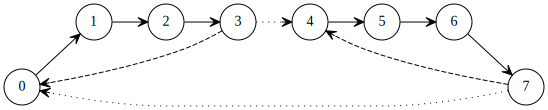

In [18]:
permutation = [1, 2, 3, 4, 5, 6, 7, 0]
i, j = 3, 7
arcs = [Arc(k, x, attributes= {"style" : ("dotted" if k == i or k == j else "solid")}) for k, x in enumerate(permutation)]
arcs.append(Arc(i, permutation[j], attributes={"constraint" : "False", "style" : "dashed"}))
arcs.append(Arc(j, permutation[i], attributes={"constraint" : "False", "style" : "dashed"}))
print("Before transposition:", decompose_cycles(permutation))
permutation[i], permutation[j] = permutation[j], permutation[i]
print("After transposition: ", decompose_cycles(permutation))
Graph(arcs).Visualize()

Case 2. Swapping elements in different cycles. Consider a cycle $c_1, \ldots, c_m$ and $d_1, \ldots, d_k$. Suppose we are swapping $p_{c_i}$ with $p_{d_j}$. We will end up with the cycle $c_1, \ldots, c_i, d_{j+1}, \ldots, d_k, d_1, \ldots, d_j$.

Before transposition: [[1, 2, 3, 0], [5, 6, 7, 4]]
After transposition:  [[1, 2, 4, 5, 6, 7, 3, 0]]


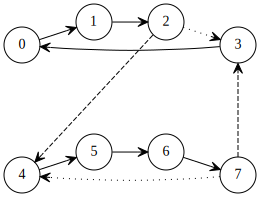

In [19]:
permutation = [1, 2, 3, 0, 5, 6, 7, 4]
i, j = 2, 7
arcs = [Arc(k, x, attributes= {"style" : ("dotted" if k == i or k == j else "solid")}) for k, x in enumerate(permutation)]
arcs.append(Arc(i, permutation[j], attributes={"constraint" : "False", "style" : "dashed"}))
arcs.append(Arc(j, permutation[i], attributes={"constraint" : "False", "style" : "dashed"}))
print("Before transposition:", decompose_cycles(permutation))
permutation[i], permutation[j] = permutation[j], permutation[i]
print("After transposition: ", decompose_cycles(permutation))
Graph(arcs).Visualize()

in the end we get the following lemma

**Lemma**. If $p$ is a permutation with order $n$ and $m$ cycles then the minimum number of swaps needed to sort the permutation is $n$ - $m$.

**Proof**. Given above. $\blacksquare$

For consistency lets prove another simple lemma so our analysis will be valid for a sequence of unique elements rather than a permutation.

**Lemma**. Suppose that $a_1, \ldots, a_n$ is a sequence of unique elements and $p_1, \ldots, p_n$ is a permutation such that $p_i$ is the position of the $a_i$ when $a$ is sorted. Since $a$ does not have duplicate values this definition is unambiguous. Any comparison based sorting algorithm performs the same actions on $a$ and $p$.

**Proof**. The idea is simple: lets just prove that for any $i$ the sets $\{j|a_i<a_j\}$ and $\{j|p_i<p_j\}$ are equal. This mean that any comparison made by the algorithm will have the same result whether we got $a$ or $p$ initially. By definition if $a_i<a_j$ then position of $a_i$ in sorted order is lower than position of $p_j$, and so $p_i<p_j$ and vice versa. $\blacksquare$

Finally we arive at the following theorem.

**Theorem**. Selection sort performs the least possible swaps need to sort an array if it consits of unique elements.

**Proof**. Due to latter lemma we may prove this only for permutations. Due to first lemma we just need to prove that swaps in selection sort increases the number of cycles. When applied to permutation at step $i$ selection sort finds element $a_j=i$ and swaps it with the $a_i$. Since $a_j=i$ the swap is performed over a single cycle and thus increases the number of cycles by $1$. $\blacksquare$ 

In [20]:
def calc_minimum_number_of_swaps(array):
    pos = dict()
    for i, x in enumerate(sorted(array)):
        pos[x] = i

    num_cycles = len(decompose_cycles([pos[x] for x in array]))
    return len(array) - num_cycles

In [21]:
array = [x for x in initial_array]
print(f"Minimum number of swaps: {calc_minimum_number_of_swaps(array)}")

Minimum number of swaps: 12


## Logarithmic sorts

The term "logarithmic" arises from the fact that the most used sort algorithms has a time complexity of $\mathcal{O}(n\log n)$ ($n$ being the number elements in the array) and there cannot be asymptotically faster comparison based sorting algorithm. The proof of this fact comes from another permutation analysis variant. To prove it smoothly lets start from a lemma

**Lemma**. Given a finite set $X$ and an element $x\in X$. You can ask questions "Is $x$ in $A\subset X$?". The goal is to find $x$ by asking these questions. Now, the claim is that no algorithm can guarantee less then
$$
\log_2 |X|
$$
questions for any $x$.

**Proof**. At any point we have a subset $B\subset X$ we have already discovered such that $x\in B$. After a single question with set $A$ we will either have $B\cap A$ or $B\cap (X\setminus A)$. Are goal is to get a set with size $1$, after requesting $A$ in the worst case we will end up with the subset of the larger size and so ideal algorithm will split $B$ in half. From that we get that in ideal situation our algorithm cannot guarantee size reduction more than in $2$ for a single question. This leads to a $\log_2 |X|$ lower bound on the number of questions. $\blacksquare$

Now, the sorting algorithms lower bound

**Theorem**. The amount of comparisons needed to determine the permutation of the sorted order for the array is $\Theta (n\log n)$ ($n$ is the size of the array) in the worst case. And thus, complexity of any comparison based sorting algorithm is lower bounded by this value.

**Proof**. In the worst case we are to find a single possible permutation from a $n!$ permutation. A single comoparison splits the set of all permutations in two and gives us information whether sorted perutation is in one of them. This is exactly the scheme that happens in the lemma and thus we can deduce the lower bound
$$
\log_2(n!)\geq\log_2\left(\frac{n}{2}\right)^{\frac{n}{2}}=\frac{n}{2}\log_2\frac{n}{2}=\Theta(n\log n)
$$

## Quicksort
Classic quicksort by Hoare is a longstaning practical choice for sorting. The general idea is to do the following divide-and-conquer procedure 
* Choose a random element $x$ from the array
* Split the array into elements that compare less then $x$ and others
* Process recursively these two arrays
* Concatenate the results

The key of the algorithm is an effective procedure for the second stage that is based on the two-pointer method: first pointer starts at the beginning of the array and moves forward, second pointer starts at the end of the array and moves backwards, a single iteration consists of moving first pointer forward until it finds an element greater than $x$ and moving the second pointer backwards until it finds an element less then $x$, then we swap these elements and continue until these two pointers meet. The whole procedure scans the array a single time and thus is linear. It is notable that the procedure can be effetively done on both array and doubly linked list.

In [22]:
import random

def qsort_state(array, left, right, x, p, q):
    colors = []
    for i, y in enumerate(array):
        if y == x:
            colors.append('magenta')
        elif left <= i and i < right:
            if i == p:
                colors.append('green')
            elif i == q:
                colors.append('yellow')
            else:
                colors.append('red')
        else:
            colors.append('blue')
    return basic_sort_state(array, colors)

def qsort(array, left, right, states):
    if right - left <= 1:
        return 0, 0
    x = array[random.randint(left, right - 1)]
    p = left
    q = right - 1
    states.append(qsort_state(array, left, right, x, -1, -1))
    comparisons, swaps = 0, 0
    while p <= q:
        comparisons += 1
        while array[p] < x:
            comparisons += 1
            p += 1
            states.append(qsort_state(array, left, right, x, p, q))
        comparisons += 1
        while array[q] > x:
            comparisons += 1
            q -= 1
            states.append(qsort_state(array, left, right, x, p, q))
        if p <= q:
            swaps += 1
            array[p], array[q] = (array[q], array[p])
            states.append(qsort_state(array, left, right, x, p, q))
            p += 1
            q -= 1
            if p <= q:
                states.append(qsort_state(array, left, right, x, p, q))
    add_comparisons, add_swaps = qsort(array, left, q + 1, states)
    comparisons, swaps = (comparisons + add_comparisons, swaps + add_swaps)
    add_comparisons, add_swaps = qsort(array, p, right, states)
    comparisons, swaps = (comparisons + add_comparisons, swaps + add_swaps)
    
    return comparisons, swaps

In [23]:
array = [x for x in initial_array]
states = []
comparisons, swaps = qsort(array, 0, len(array), states)
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13]
Comparisons: 63
Swaps:       15


In [24]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=59), Output()), _dom_classes=('widget-interac…

## Analysis
Here we will assume that separating element is chosen uniformly random and so when we pick the element it has $\frac{1}{n}$ probability of splitting the array of $n+1$ elements into two subarrays of sizes $(1, n), (2, n-1), \ldots, (n, 1)$ respectively. As we discussed we need a two-pointer based linear scan to perform the splitting and so we can give the following recursion on the average complexity of quicksort for an array of size $n$:
$$
T(n)=\alpha n+\frac{1}{n-1}\sum_{i=1}^{n-1}\left[T(i)+T(n-i)\right]=\alpha n+\frac{2}{n-1}\sum_{i=1}^{n-1}T(i)
$$
Lets compare $T(n+1)$ and $T(n)$:
$$
\begin{align*}
(n-1)T(n)&=\alpha n(n-1)+2\sum_{i=1}^{n-1}T(i) \\
n T(n+1)&=\alpha (n+1)n+2\sum_{i=1}^{n}T(i)
\end{align*}
$$
From this we can get a lower order recursion
$$
nT(n+1)-(n-1)T(n)=2\alpha n + 2T(n)
$$
and a pretty form
$$
\frac{T(n+1)}{n+1}=\frac{T(n)}{n}+\frac{2 \alpha}{n+1}
$$
that can be easily backtraced to get
$$
T(n)=n\sum_{i=1}^{n-1}\left[\frac{2 \alpha}{i}\right]
$$
The sum above is a harmonic sequence that behaves asymptotically as $\log (n)$ which leads to a simple
$$
T(n)=\Theta (n\log n)
$$

## Bonus: qucksort based $k$th order statistic
The problem of $k$th order statistic is to find an element at position $k$ in the sorted order of the array. Obviously we can sort an array and then findind the $k$th element would be trivial, the questions is can we do it faster? For example minimum or maximum element can be found by a simple linear scan. Another interesting thing is that $k$th element can be extracted in $\log n$ time but would require prebuilding an array into a tree which is useful in case of multiple $k$th element queries on a static/dynamic array. Finally there is an interesting quicksort based approach that is asymptotically linear in average. The idea is simple: when we do a quick sort only one part of the array will contain the $k$th element so don't sort the other part. 

With this trick we can solve in linear time (on the size of the array) two similar problems:
* Extract $k$ minimum (maximum) elements from the array in some order
* Find the $k$th minimum (maximum) element in the array

In [25]:
def qsort_nth_element(array, left, right, k, states):
    if right - left <= 1:
        return 0, 0
    x = array[random.randint(left, right - 1)]
    p = left
    q = right - 1
    states.append(qsort_state(array, left, right, x, -1, -1))
    comparisons, swaps = 0, 0
    while p <= q:
        comparisons += 1
        while array[p] < x:
            comparisons += 1
            p += 1
            states.append(qsort_state(array, left, right, x, p, q))
        comparisons += 1
        while array[q] > x:
            comparisons += 1
            q -= 1
            states.append(qsort_state(array, left, right, x, p, q))
        if p <= q:
            swaps += 1
            array[p], array[q] = (array[q], array[p])
            states.append(qsort_state(array, left, right, x, p, q))
            p += 1
            q -= 1
            if p <= q:
                states.append(qsort_state(array, left, right, x, p, q))
    if k < q + 1:
        add_comparisons, add_swaps = qsort_nth_element(array, left, q + 1, k, states)
        comparisons, swaps = (comparisons + add_comparisons, swaps + add_swaps)
    if k >= p:
        add_comparisons, add_swaps = qsort_nth_element(array, p, right, k, states)
        comparisons, swaps = (comparisons + add_comparisons, swaps + add_swaps)
    
    return comparisons, swaps

In [26]:
array = [x for x in initial_array]
states = []
k = len(array) // 2
comparisons, swaps = qsort_nth_element(array, 0, len(array), k, states)
states.append(qsort_state(array, 0, k + 1, array[k], -1, -1))
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-10, -11, -9, -8, -5, 2, 5, 7, 8, 9, 11, 13, 10]
Comparisons: 62
Swaps:       9


In [27]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=56), Output()), _dom_classes=('widget-interac…

## Analysis
Similarly to analysys of quicksort we have
$$
T(n)=\alpha n+\frac{1}{n-1}\sum_{i=1}^{n-1}T(i)
$$
Performing the same trick with
$$
nT(n+1)-(n-1)T(n)=2\alpha n + T(n)
$$
and after simplification
$$
T(n+1)=T(n)+2\alpha
$$
which leads to $\theta(n)$.

## Merge sort
This is another algorithm based on divide-and-conquer paradigm:
* Divide an array into $2$ subarrays of almost equal size
* Use recursion to sort subarrays
* Merge the result

Again the idea is that the last part can be done by a two-pointer linear scan by the following procedure
* Initialize first pointer at the beginning of the first half, second pointer at the beginning of the second half and a temporary array
* Until one of pointers reached the end of its half push back the the lesser elements from the ones pointed at currently at the end of the temporary array and move corresponding pointer forward
* Move the remaining elements of one of the arrays at the end of the temporary array

The correctness is proved simply by the fact that at any moment the last element of the temporary array is less then both elements pointed out. This invariant is preserved by our main operation due to the fact that initial arrays are sorted and pushed back element is the lesser one. Unfortunately this procedure requires additional storage when we are performing it over an array, there are in-place methods but usually they are much slower. On the other hand it happens that merging procedure can be implemented inplace on a singly linked list.

In [28]:
class SingleLinkedListNode:
    def __init__(self, value, child = None):
        self.value = value
        self.child = child
                    
    def merge_sort(self, length):
        if length <= 1:
            return self, 0

        length_halfed = length // 2
        current = self
        head = self

        for _ in range(length_halfed - 1):
            current = current.child

        right_head = current.child
        current.child = None
        comparisons = 1
        head, left_comparisons = head.merge_sort(length_halfed)
        right_head, right_comparisons = right_head.merge_sort(length - length_halfed)
        comparisons += left_comparisons + right_comparisons

        if head.value <= right_head.value:
            current = head
            result_head = head
            head = head.child
        else:
            current = right_head
            result_head = right_head
            right_head = right_head.child

        while head is not None and right_head is not None:
            comparisons += 1
            if head.value <= right_head.value:
                current.child = head
                current = head
                head = head.child
            else:
                current.child = right_head
                current = right_head
                right_head = right_head.child

        if head != None:
            current.child = head
        else:
            current.child = right_head
        return result_head, comparisons

    def __str__(self):
        result = []
        current = self
        while current is not None:
            result.append(str(current.value))
            current = current.child
            
        return '[ ' + ', '.join(result) + ' ]'

class SingleLinkedList:
    def __init__(self):
        self.head = None
        self.size = 0
        
    def tail(self):
        if self.size == 0:
            return None
        result = self.head
        while result.child is not None:
            result = result.child
        return result
        
    def put_front(self, value):
        self.head = SingleLinkedListNode(value, self.head)
        self.size += 1
        
    def merge_sort(self):
        self.head, comparisons = self.head.merge_sort(self.size)
        return comparisons
        
    def __str__(self):
        return self.head.__str__()
            
    @staticmethod
    def from_list(l):
        result = SingleLinkedList()
        for value in reversed(l):
            result.put_front(value)
        
        return result

In [29]:
single_list = SingleLinkedList.from_list(initial_array)
print(single_list)
print("Comparisons:", single_list.merge_sort())
print(single_list)

[ 2, -11, 5, 8, 9, 7, -5, -8, -9, 10, 11, 13, -10 ]
Comparisons: 31
[ -11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13 ]


## Analysis
Recurrence relation for the merge sort is formally given by
$$
T(n)=\alpha n + T\left(\left\lfloor\frac{n}{2}\right\rfloor\right)+T\left(\left\lfloor\frac{n+1}{2}\right\rfloor\right)
$$
which can be safely simplified to
$$
T(n)=\alpha n + 2T\left(\frac{n}{2}\right)
$$
This kind of relations is a part of [master theorem](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)) which provides us with $T(n)=\Theta(n\log n)$, but this particular case is easily verified
$$
T(n)=\alpha n + 2T\left(\frac{n}{2}\right)=2\alpha n + 4T\left(\frac{n}{4}\right)=\ldots=\alpha nk + 2^kT\left(\frac{n}{2_k}\right)
$$
Here we apply recursion to the point where $2^{k-1}<n\leq 2^{k}$ and thus we get
$$
T(n)\approx\alpha n\log_2 n+nC
$$

## Heapsort
This algorithm can be viewed as a modification of selection sort with a more complex minimum finding algorithm. There are a lot of ways to achieve a data structure that finds and extracts minimum with $\mathcal{O}(\log n)$ complexity, the interesting part about heap (or more formally binomial heap) is that it allows to do that inplace. The heap is a binary tree that is stored in an array such that
* Root is placed at index $0$, two children of node stored at $i$ are stored at $2i+1$, $2i+2$
* Value at parent is always less than the value of its children
There are two $\log n$ operations that preserve these invariant: 
* Add an element: new element is placed at the end of the array and poped up in the tree by swapping with the parent nodes until it either arrives at root or parent has lesser value
* Extract minimum: due to invariant minimum element is stored at the root node, to remove it we place the last element at the root and move it to bottom
For an acsending order it is easier to do maximum heap rather than minimum

In [61]:
from interactive_visualization.graph_utils import Graph, Arc

def heap_sort_state(array, length, index):
    arcs = []
    for i, x in enumerate(array):
        left_child, right_child = 2 * i + 1, 2 * i + 2
        if left_child < len(array):
            arcs.append(Arc(i, left_child))
        if right_child < len(array):
            arcs.append(Arc(i, right_child))
            
    graph = Graph(arcs)
    for i in range(length):
        graph.nodes[i].SetColor("blue")
    graph.nodes[index].SetColor("red")
    return graph.Visualize(array, { "rankdir": "UB" })

In [64]:
def move_to_top(array, index, states=None):
    comparisons, swaps = 0, 0
    parent = (index - 1) // 2
    length = index + 1
    if states is not None:
        states.append(heap_sort_state(array, length, index))
    while index > 0 and array[index] > array[parent]:
        comparisons += 1
        swaps += 1
        array[index], array[parent] = array[parent], array[index]
        index, parent = parent, (parent - 1) // 2
        if states is not None:
            states.append(heap_sort_state(array, length, index))
    
        
    if index > 0:
        comparisons += 1
    
    return comparisons, swaps

def move_to_bottom(array, length, states=None):
    comparisons, swaps = 0, 0
    index, left_child, right_child = 0, 1, 2
    if states is not None:
        states.append(heap_sort_state(array, length, index))
    while left_child < length:
        comparisons += 2 if right_child < length else 1
        max_child = left_child if (right_child >= length or array[left_child] > array[right_child]) else right_child
        if array[index] < array[max_child]:
            array[index], array[max_child] = array[max_child], array[index]
            swaps += 1
            index, left_child, right_child = max_child, 2 * max_child + 1,2 * max_child + 2
            if states is not None:
                states.append(heap_sort_state(array, length, index))
        else:
            break
    return comparisons, swaps
    
    
def heap_sort(array, states=None):
    comparisons, swaps = 0, 0
    # Stage 1: construct a heap inplace
    for i, _ in enumerate(array):
        new_comparisons, new_swaps = move_to_top(array, i, states)
        comparisons, swaps = comparisons + new_comparisons, swaps + new_swaps
        
    # Stage 2: select elements in descending order
    for i, _ in enumerate(array):
        array[0], array[len(array) - i - 1] = array[len(array) - i - 1], array[0]
        swaps += 1
        new_comparisons, new_swaps = move_to_bottom(array, len(array) - i - 1, states)
        comparisons, swaps = comparisons + new_comparisons, swaps + new_swaps
    
    return comparisons, swaps

In [65]:
array = [x for x in initial_array]
states = []
comparisons, swaps = heap_sort(array, states)
print(array)
print(f"Comparisons: {comparisons}")
print(f"Swaps:       {swaps}")

[-11, -10, -9, -8, -5, 2, 5, 7, 8, 9, 10, 11, 13]
Comparisons: 61
Swaps:       49


In [66]:
animate_list(states, play=True);

interactive(children=(IntSlider(value=0, description='step', max=61), Output()), _dom_classes=('widget-interac…

## Analysis
Here the analysis is quite straightforward: insertion of a $k$th element in the first stage is $\Theta(\log k)$, selection of the $k$th element in second stage is $\Theta(\log (n-k))$ that gives $\Theta (n\log n)$.